In [3]:
#Q.4 Most Frequent Baseline Classifier

from urllib.request import urlopen
import json, gzip
import numpy as np
from sklearn.metrics import accuracy_score

data_source = "https://www.csee.umbc.edu/courses/graduate/678/spring23/materials/mnist_rowmajor.jsonl.gz"
url_response = urlopen(data_source)

with gzip.open(url_response, 'rb') as f:
    data = [json.loads(line) for line in f]

training_data = [d for d in data if d['split'] == 'train']
train_data = training_data[:50000]
dev_data = training_data[50000:]
test_data = [d for d in data if d['split'] == 'test']

x_train = [d['image'] for d in train_data]
y_train = [d['label'] for d in train_data]

x_dev = [d['image'] for d in dev_data]
y_dev = [d['label'] for d in dev_data]

most_freq_classifier = DummyClassifier(strategy='most_frequent')

most_freq_classifier.fit(x_train, y_train)

y_pred = most_freq_classifier.predict(x_dev)

accuracy = accuracy_score(y_dev, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.1147


No of Epochs: 40
Learning 0.85
Total no of Train Input Data Samples: 50000
Train Input Data Features: 784
Accuracy on dev set: 0.9014


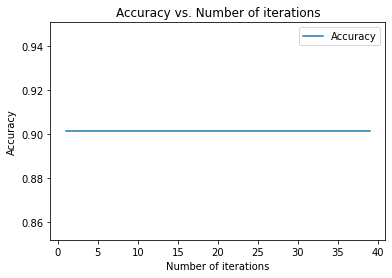

Precision on dev set: 0.9017829748511642


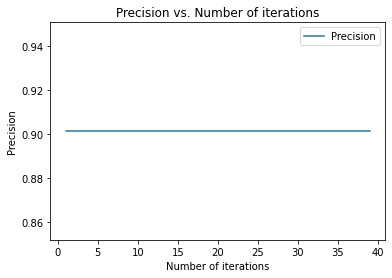

In [17]:
# Q. 5 Multiclass Perceptron

from urllib.request import urlopen
import json, gzip
import numpy as np
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt

data_source = "https://www.csee.umbc.edu/courses/graduate/678/spring23/materials/mnist_rowmajor.jsonl.gz"
url_response = urlopen(data_source)

with gzip.open(url_response, 'rb') as f:
    data = [json.loads(line) for line in f]

training_data = [d for d in data if d['split'] == 'train']
train_data = training_data[:50000]
dev_data = training_data[50000:]
test_data = [d for d in data if d['split'] == 'test']

x_train = np.array([d['image'] for d in train_data])
y_train = np.array([d['label'] for d in train_data])

x_dev = np.array([d['image'] for d in dev_data])
y_dev = np.array([d['label'] for d in dev_data])

x_toy = [(-1,1), (-1, -1), (0.5, 0.5), (1, -1), (0.5, -1)]
y_toy = [1, -1, 1, 1, -1]

def train_perceptron_classifier(x_train, y_train, no_of_classes, no_of_epochs, learning_rate):
    no_of_samples, no_of_features = x_train.shape
    print("Total no of Train Input Data Samples:", no_of_samples)
    print("Train Input Data Features:", no_of_features)

    #Initializing Weight Matrix of size 10*784
    weights = np.zeros((no_of_classes, no_of_features))
    #Initializing Bias Matrix of size 1*10
    bias = np.ones((no_of_classes, 1))
    
    for epoch in range(no_of_epochs):
        for i in range(no_of_samples):
            x_current = x_train[i]
            y_current = y_train[i]
            scores = np.dot(weights, x_current) + bias #scores will be a 1*10 matrix 
            y_pred = np.argmax(scores)  #The index of the maximum value from scores
            if y_pred != y_current:
                weights[y_current] += learning_rate * x_current 
                weights[y_pred] -= learning_rate * x_current 
                
    return weights

def classify(x_dev, weights):
    scores = np.dot(x_dev, weights.T)
    y_pred = np.argmax(scores, axis=1)
    return y_pred

no_of_classes = 10
no_of_epochs = 40
print("With Bias")
print("No of Epochs:", no_of_epochs)
learning_rate = 0.85
print("Learning", learning_rate)

weights = train_perceptron_classifier(x_train, y_train, no_of_classes, no_of_epochs, learning_rate)

y_pred = classify(x_dev, weights)

accuracy = accuracy_score(y_dev, y_pred)
print("Accuracy on dev set:", accuracy)

accuracies = []
for i in range(1, no_of_epochs):
    y_pred = classify(x_dev, weights)
    accuracy = accuracy_score(y_dev, y_pred)
    accuracies.append(accuracy_score(y_dev, y_pred))

plt.plot(range(1, no_of_epochs), accuracies, label='Accuracy')
plt.title("Accuracy vs. Number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

precision = precision_score(y_dev, y_pred, average='weighted')
print("Precision on dev set:", precision)

precisions = []
for i in range(1, no_of_epochs):
    y_pred = classify(x_dev, weights)
    precision = precision_score(y_dev, y_pred, average='weighted')
    precisions.append(accuracy_score(y_dev, y_pred))

plt.plot(range(1, no_of_epochs), precisions, label='Precision')
plt.title("Precision vs. Number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Precision")
plt.legend()
plt.show()



In [19]:
#Q.6

from urllib.request import urlopen
import json, gzip
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt

data_source = "https://www.csee.umbc.edu/courses/graduate/678/spring23/materials/mnist_rowmajor.jsonl.gz"
url_response = urlopen(data_source)

with gzip.open(url_response, 'rb') as f:
    data = [json.loads(line) for line in f]

train_data = [d for d in data if d['split'] == 'train']
test_data = [d for d in data if d['split'] == 'test']

x_train = np.array([d['image'] for d in train_data])
y_train = np.array([d['label'] for d in train_data])

x_test = np.array([d['image'] for d in test_data])
y_test = np.array([d['label'] for d in test_data])

#Perceptron Model from Q.5
def train_perceptron_classifier(x_train, y_train, no_of_classes, no_of_epochs, learning_rate):
    no_of_samples, no_of_features = x_train.shape
    print("Total no of Train Input Data Samples:", no_of_samples)
    print("Train Input Data Features:", no_of_features)

    #Initializing Weight Matrix of size 10*784
    weights = np.zeros((no_of_classes, no_of_features))
    #Initializing Bias Matrix of size 1*10
    bias = np.ones((no_of_classes, 1))
    
    for epoch in range(no_of_epochs):
        for i in range(no_of_samples):
            x_current = x_train[i]
            y_current = y_train[i]
            #scores = np.dot(weights, x_current) + bias #scores will be a 1*10 matrix
            scores = np.dot(weights, x_current) 
            y_pred = np.argmax(scores)  #The index of the maximum value from scores
            if y_pred != y_current:
                weights[y_current] += learning_rate * x_current 
                weights[y_pred] -= learning_rate * x_current 
                
    return weights

#Training the perceptron model on the entire, original train set
no_of_classes = 10
no_of_epochs = 40
print("With Bias")
print("No of Epochs:", no_of_epochs)
learning_rate = 0.85
print("Learning", learning_rate)
weights = train_perceptron_classifier(x_train, y_train, no_of_classes, no_of_epochs, learning_rate)

#Evaluating the perceptron model on the original 10,000 image test set
def classify(x_test, weights):
    scores = np.dot(x_test, weights.T)
    y_pred = np.argmax(scores, axis=1)
    return y_pred

y_pred_perceptron = classify(x_test, weights)

accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
print("Accuracy of Perceptron Model on Test Data:", accuracy_perceptron)

#Most Frequent Baseline Model Q.4
most_freq_classifier = DummyClassifier(strategy='most_frequent')
#Training the baseline model on the entire, original train set
most_freq_classifier.fit(x_train, y_train)
#Evaluating baseline models on the original 10,000 image test set
y_pred_baseline = most_freq_classifier.predict(x_test)

accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print("Accuracy of Baseline Model on Test Data:", accuracy_baseline)

With Bias
No of Epochs: 40
Learning 0.85
Total no of Train Input Data Samples: 60000
Train Input Data Features: 784
Accuracy of Perceptron Model on Test Data: 0.8776
Accuracy of Baseline Model on Test Data: 0.1135
